In [27]:
import pandas as pd
import seaborn as sns
from fidap import fidap_client
import config

In [28]:
fidap = fidap_client(db="bq", api_key=config.FIDAP_API_KEY)

# Crypto data exploration
The question we want to answer is whether or not cryptocurrencies are actually "digital gold" and find what asset classes cryptos are actually most correlated with.

In this notebook, we run a correlation of cryptos with various assets - including SPY, gold ETFs, and individual stocks (let's look at Microstrategy and Telsa in particular) to see what relationship they have with crypto.

## Crypto Overwiew

List all distinct tickers in the crypto DB table.

In [30]:
df_crypto = fidap.sql("select distinct symbol FROM fidapschema.crypto;")
df_crypto

,symbol
0,BTC/USDT
1,ETH/USDT
2,LTC/USDT
3,XRP/USDT


## Cryptocurrency Correlations

In [34]:
df_crypto = fidap.sql("select date, symbol, close from fidapschema.crypto;")
df_crypto.drop_duplicates(keep=False,inplace=True)
df_crypto.set_index("date", inplace=True)
df_summary_pivot = df_crypto.pivot(columns='symbol', values='close')
df_summary_pivot.dropna(inplace=True)
corr = df_summary_pivot.corr()

           date    symbol        close
0    2021-02-21  BTC/USDT  57408.57000
1    2021-02-20  BTC/USDT  55841.19000
2    2021-02-19  BTC/USDT  55906.00000
3    2021-02-18  BTC/USDT  51552.60000
4    2021-02-17  BTC/USDT  52119.71000
...         ...       ...          ...
5139 2018-05-08  XRP/USDT      0.80667
5140 2018-05-07  XRP/USDT      0.82490
5141 2018-05-06  XRP/USDT      0.86483
5142 2018-05-05  XRP/USDT      0.90280
5143 2018-05-04  XRP/USDT      0.88990

[5144 rows x 3 columns]


<AxesSubplot:xlabel='symbol', ylabel='symbol'>

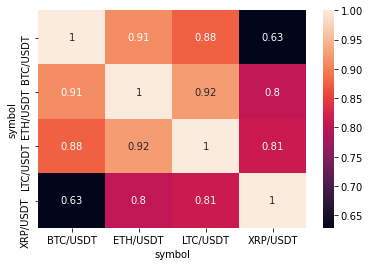

In [35]:
sns.heatmap(corr, annot=True)

## Bitcoin Correlations

In [44]:
def get_correlation(ticker: str):
    df_corr = fidap.sql(f"""
    SELECT L.date, close as {ticker}, R.btc_usd FROM fidapschema.daily as L
    LEFT OUTER JOIN 
    (SELECT date, close as btc_usd FROM fidapschema.crypto WHERE symbol="BTC/USDT")
    R ON L.date=R.date WHERE ticker="{ticker}"
    ORDER BY date DESC;
    """)
    df_corr.set_index("date", inplace=True)
    df_corr.dropna(inplace=True)
    df_values = df_corr.corr().values.tolist()
    print(f"""The overall correlation between BTC and {ticker} is: {round(df_values[0][1], 2)}\n\n""")
    df_corr.plot.line(figsize=(7,7),subplots=True, title=f"Price Charts for {ticker} and BTC")

### Tesla (TSLA)

The price chart below attempts to show the correlation between TSLA and BTC.

The overall correlation between BTC and TSLA is: -0.47




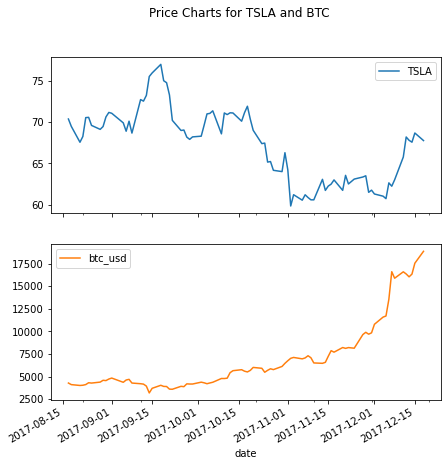

In [45]:
get_correlation('TSLA')

### Dow Jones ETF (DIA)

The price chart below attempts to show the correlation between Dow Jones and BTC.

The overall correlation between BTC and DIA is: 0.86




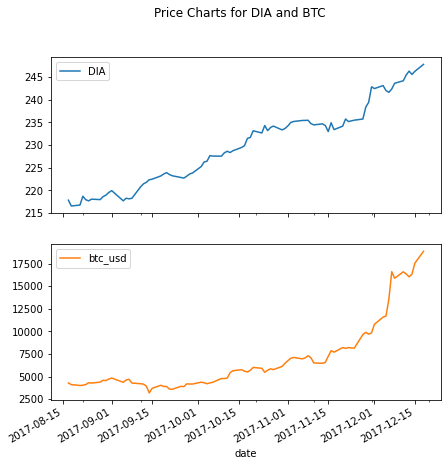

In [46]:
get_correlation('DIA')

### S&P500 (SPY)

The price chart below attempts to show the correlation between the S&P500 and BTC.

The overall correlation between BTC and SPY is: 0.84




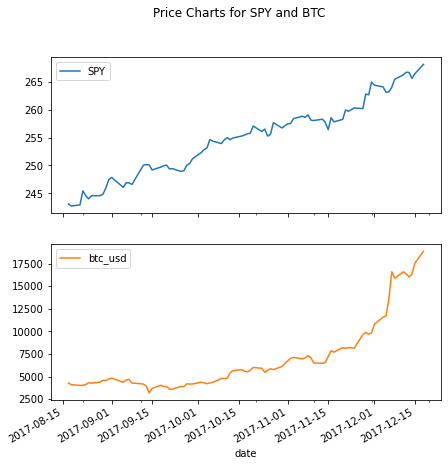

In [47]:
get_correlation('SPY')

### Microstrategy (MSTR)

The price chart below attempts to show the correlation between MSTR and BTC.

The overall correlation between BTC and MSTR is: 0.46




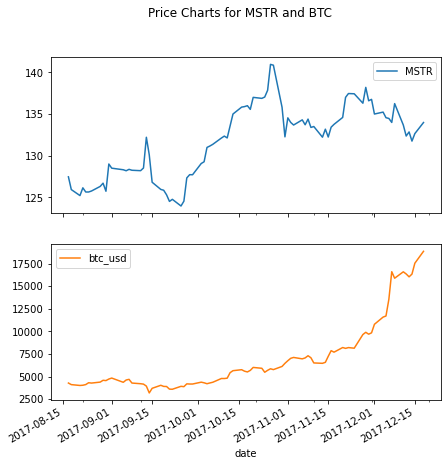

In [48]:
get_correlation('MSTR')

### Gold ETF (GLD)
The price chart below show the correlation between Gold Tracking ETF's and BTC.

The overall correlation between BTC and GLD is: -0.65




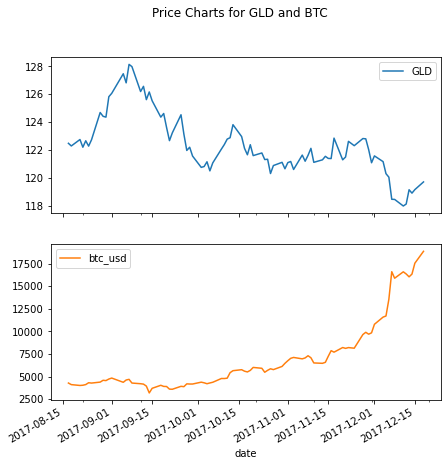

In [49]:
get_correlation('GLD')

### NASDAQ Composite ETF (ONEQ)
The price chart below show the correlation between NASDAQ Composite Index and BTC.

The overall correlation between BTC and ONEQ is: 0.77




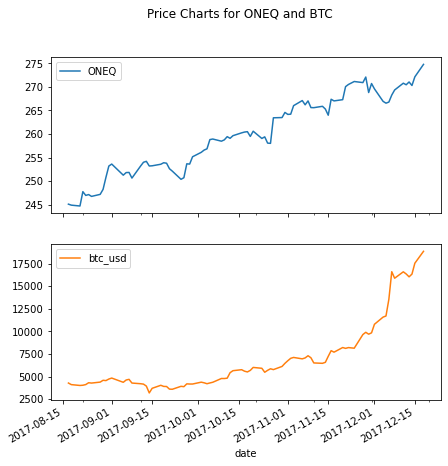

In [50]:
get_correlation('ONEQ')

### Ark Innovation Fund ETF (ARKK)

The price chart below show the correlation between Ark Innovation Fund ETF (ARK and BTC.

The overall correlation between BTC and ARKK is: 0.81




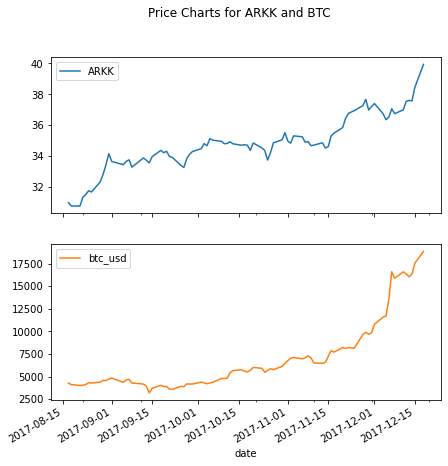

In [51]:
get_correlation('ARKK')

### Brent Crude Oil Tracker ETF (BNO)
The price chart below show the correlation between Brent Crude Oil and BTC.

The overall correlation between BTC and BNO is: 0.71




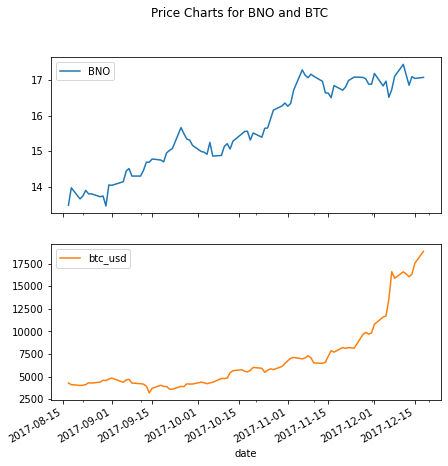

In [52]:
get_correlation('BNO')

### 20+ Year Treasury Bond ETF (TLT)

The price chart below show the correlation between 20+ Year Treasury Bond Market and BTC.

The overall correlation between BTC and TLT is: 0.24




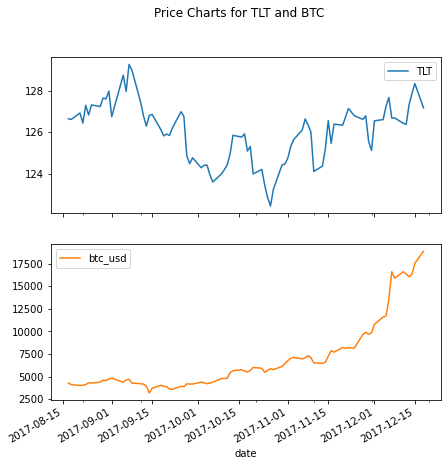

In [53]:
get_correlation('TLT')

## Summary

In [85]:
df_summary = fidap.sql(f"""
select date, ticker, close from fidapschema.daily 
where ticker in ("TSLA", "DIA", "MSTR", "SPY", "GLD", "ONEQ", "ARKK", "BNO", "TLT")
UNION
ALL (SELECT date, symbol as ticker, close FROM fidapschema.crypto where symbol="BTC/USDT") order by date;""")
df_summary

,date,ticker,close
0,2016-01-04,SPY,201.020
1,2016-01-04,DIA,171.290
2,2016-01-04,TLT,121.450
3,2016-01-04,MSTR,171.130
4,2016-01-04,TSLA,44.682
...,...,...,...
13157,2021-03-29,BNO,16.400
13158,2021-03-29,SPY,395.780
13159,2021-03-29,ONEQ,506.200
13160,2021-03-29,TLT,135.500


In [86]:
df_summary.set_index("date", inplace=True)

In [95]:
df_summary_pivot = df_summary.pivot_table(columns='ticker', index=['date'], values='close')
df_summary_pivot.dropna(inplace=True)

Summary of all correlations Tabulated as below.

In [96]:
df_summary_pivot.corr()['BTC/USDT'].to_frame()

,BTC/USDT
ticker,
ARKK,0.821145
BNO,-0.220816
BTC/USDT,1.000000
DIA,0.666542
GLD,0.518065
MSTR,0.917404
ONEQ,0.754819
SPY,0.736650
TLT,0.336435
